In [232]:
import numpy as np
import pylab as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = (10, 10)

def deg(x):
    return x * 180./np.pi
def rad(x):
    return x * np.pi/180

im folgenden die längen und der feste winkel fürs fourbar. a0, b0 etc. ist das perfekte fourbar, a, b etc. das reale. nach Verändern der Werte, oben "Cell" -> "Run all" wählen

In [233]:
a0=200.
b0=1000.
c0=200.
d0=1000.
# alpha ist der winkel zwischen den vektoren von achse 3 zur hand u von achse 3 zum hinteren oberen fourbar-gelenk
alpha = rad(180) # up to now, alpha!=180 is not treated consistently below. wir können aber obda alpha=180 annehmen

a=200.
b=1000.3
c=200
d=1000.


die folgende funktion theta ist die hauptsache hier: für die fourbar-längen a, b, c, d, den festen winkel alpha und den winkel beta, der der differenz der eingangswinkel entspricht (beta = theta3 - theta2) gibt sie den ausgangswinkel theta3' zurück

In [234]:
def theta(a,b,c,d,alpha,beta):
    l = (a**2+d**2-2*a*d*np.cos(beta))**.5
    return 2*np.pi - alpha - np.arccos((l**2+c**2-b**2)/(2*l*c)) - np.arccos((l**2+d**2-a**2)/(2*l*d))

im folgenden: code um das fourbar plus einen arm der länge e zu visualisieren

1.79768912955


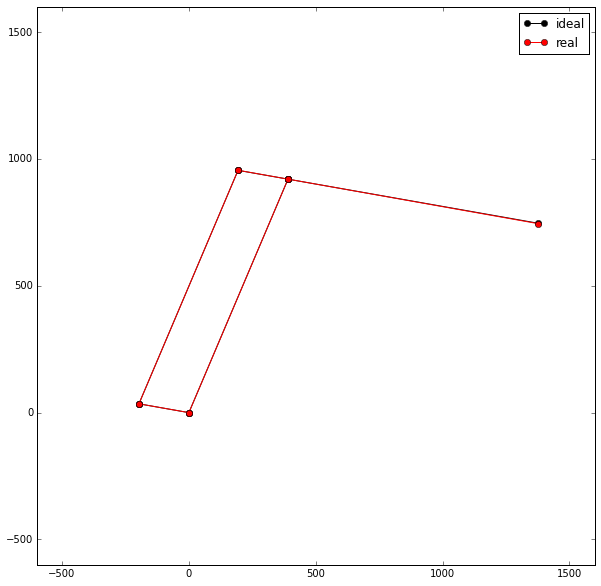

In [235]:
t2 = rad(67) # eingangswinkel gelenk 2
t3 = rad(170) # eingangswinkel gelenk 3
e = 1000. # länge schulter bis fingerspitzen

beta = t3-t2
print beta
def linefromto(p1, p2, fmt, c, label=None):
    pl.plot([p1[0], p2[0]], [p1[1], p2[1]], fmt, color=c, label=label)

def plotrob(a, b, c, d, alpha, fmt, col, label):
    a2 = np.array([0, 0])
    a3 = d*np.array([np.cos(t2), np.sin(t2)])
    a21 = a*np.array([np.cos(t3), np.sin(t3)])
    delta=theta(a,b,c,d,alpha,beta)-rad(180)+t2+alpha    #winkel von teil d relativ zu x-achse
    a4= a3+e*np.array([np.cos(delta-alpha), np.sin(delta-alpha)])
    a22 = a3+c*np.array([np.cos(delta), np.sin(delta)])

    linefromto(a2, a3, fmt, col, label)
    linefromto(a2, a21, fmt, col)
    linefromto(a3, a22, fmt, col)
    linefromto(a21, a22, fmt, col)
    linefromto(a3, a4, fmt, col)
    

plotrob(a0, b0, c0, d0, alpha, "-o", "k", "ideal")
plotrob(a, b, c, d, alpha, "-o", "r", "real")
pl.axis((-600, 1600, -600, 1600))
pl.legend()

Fürs ideale fourbar erwarten wir: ausgangswinkel = differenz der eingangswinkel, also eine Gerade wenn wir den ausgangswinkel über der Differenz der Ausgangswinkel plotten. Das reale ist über weite Strecken annähernd eine Gerade, biegt aber am Ende rapide ab.

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


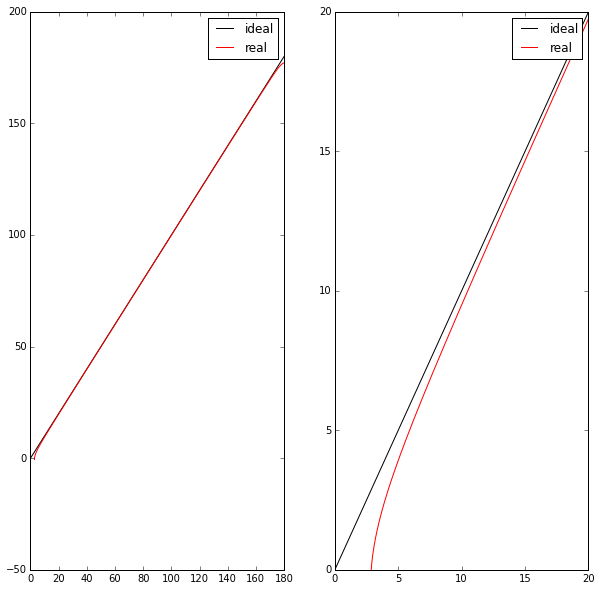

In [246]:
betas=np.linspace(0,np.pi,5000)
pl.subplot(121)
pl.plot(deg(betas), deg(theta(a0, b0, c0, d0, alpha, betas)), "k", label="ideal")
pl.plot(deg(betas), deg(theta(a, b, c, d, alpha, betas)), "r", label="real")
pl.legend()
pl.subplot(122)
pl.axis((0,20,0,20))
pl.plot(deg(betas), deg(theta(a0, b0, c0, d0, alpha, betas)), "k", label="ideal")
pl.plot(deg(betas), deg(theta(a, b, c, d, alpha, betas)), "r", label="real")
pl.legend();


im Folgenden die Abweichung von der Gerade:

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


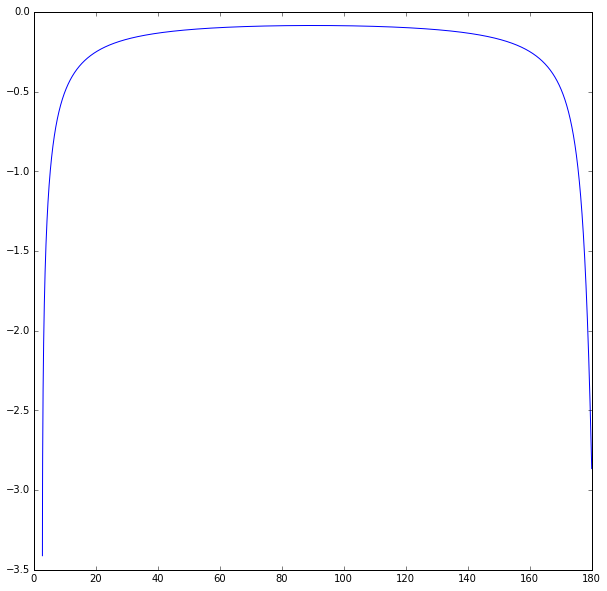

In [247]:
pl.plot(deg(betas), deg(theta(a, b, c, d, alpha, betas)-betas));

Wie gut kann eine Fourierreihe diese Abweichung modellieren?

In [251]:
period = np.pi
betas=rad(np.linspace(5, 175,5000))
def cn(n,x,y):
    c = y*np.exp(-1j*2*n*np.pi*x/period) 
    return c.sum()/c.size
def fou(Nh, x, y):
    f = np.array([cn(i,x,y)*np.exp(1j*2*i*np.pi*x/period) for i in range(-Nh,Nh+1)])
    return f.sum(axis=0)

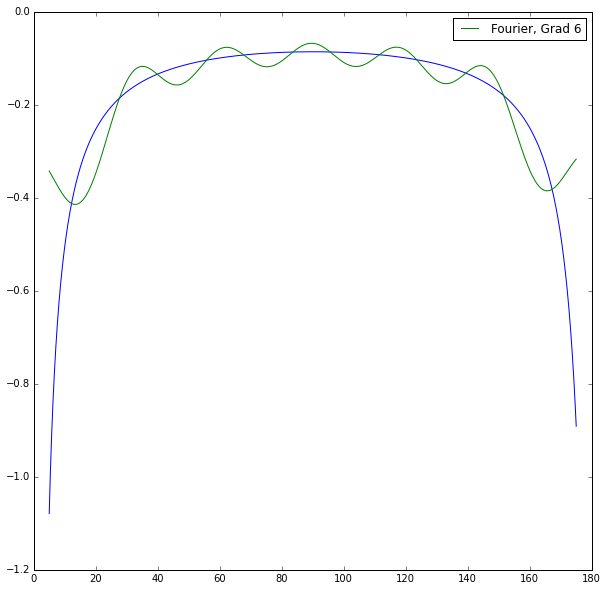

In [252]:
N = 6 # grad der Fourierreihe
pl.plot(deg(betas), deg(theta(a, b, c, d, alpha, betas)-betas))
pl.plot(deg(betas), deg(fou(N, betas, theta(a, b, c, d, alpha, betas)-betas)), label="Fourier, Grad %i" % N)
pl.legend();

Was für Abweichungen am TC ergeben sich durch die Winkelabweichungen a) überhaupt b) im Vergleich zum Fourier-kompensierten Fall?

In [255]:
ma=np.max(np.abs(theta(a, b, c, d, alpha, betas)-betas))
me=np.mean(np.abs(theta(a, b, c, d, alpha, betas)-betas))
ma_wf=np.max(np.abs(theta(a, b, c, d, alpha, betas)-betas - fou(6, betas, theta(a, b, c, d, alpha, betas)-betas)))
me_wf=np.mean(np.abs(theta(a, b, c, d, alpha, betas)-betas - fou(6, betas, theta(a, b, c, d, alpha, betas)-betas)))
print deg(ma), deg(me)
print deg(ma_wf), deg(me_wf)
print "Max. Abweichung am TCP: ", np.linalg.norm(e*np.array([1,0])-e*np.array([np.cos(ma),np.sin(ma)]))
print "Mittlere Abweichung am TCP: ", np.linalg.norm(e*np.array([1,0])-e*np.array([np.cos(me),np.sin(me)]))
print "Max. Abweichung am TCP im Vgl zu Fourier: ", np.linalg.norm(e*np.array([1,0])-e*np.array([np.cos(ma_wf),np.sin(ma_wf)]))
print "Mittlere Abweichung am TCP im Vgl zu Fourier: ", np.linalg.norm(e*np.array([1,0])-e*np.array([np.cos(me_wf),np.sin(me_wf)]))

1.07914010087 0.181282030888
0.736865696782 0.0459310682424
Max. Abweichung am TCP:  18.8342694613
Mittlere Abweichung am TCP:  3.16396699397
Max. Abweichung am TCP im Vgl zu Fourier:  12.860643923
Mittlere Abweichung am TCP im Vgl zu Fourier:  0.801648348322
